In [18]:
import scipy.io as sio
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from pathlib import Path
from typing import Union, Any, Optional
from scipy.interpolate import griddata
from scipy.signal import find_peaks
from matplotlib import cm
import re
import os 

def mat_to_dict(obj: Any) -> dict:
    '''Reads a matlab struct and turns it into a dictionary'''
    return dict(zip((e[0] for e in obj.dtype.descr), obj))

In [19]:
def load_stn_lfp(
        dir: Path,
        steady_state_time: float,
        sim_time: float
        ) -> tuple[np.ndarray, dict]:
    '''Reads STN LFP data from a .mat file'''
    lfp_file = sio.loadmat(dir / 'STN_LFP.mat')
    segments, _, _ = lfp_file['block'][0, 0]
    segment = mat_to_dict(segments[0, 0][0, 0])
    lfp = mat_to_dict(segment['analogsignals'][0, 0][0, 0])
    lfp_t = np.linspace(steady_state_time, sim_time, len(lfp['signal']))
    return lfp_t, lfp


/Users/abelrassat/Desktop/JHU/JH6/Mills_Lab/CBG_Model_Fleming_PTS/Results_freq_mod
(8075, 1)
dict_keys(['signal', 'signal_units', 'sampling_rate', 'sampling_rate_units', 't_start', 't_start_units', 'annotations'])
dict_values([array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.00040392],
       [0.00018325],
       [0.00018325]]), array(['mV'], dtype='<U2'), array([[0.01]]), array(['1/ms'], dtype='<U4'), array([[0.]]), array(['ms'], dtype='<U2'), array([[None]], dtype=object)])


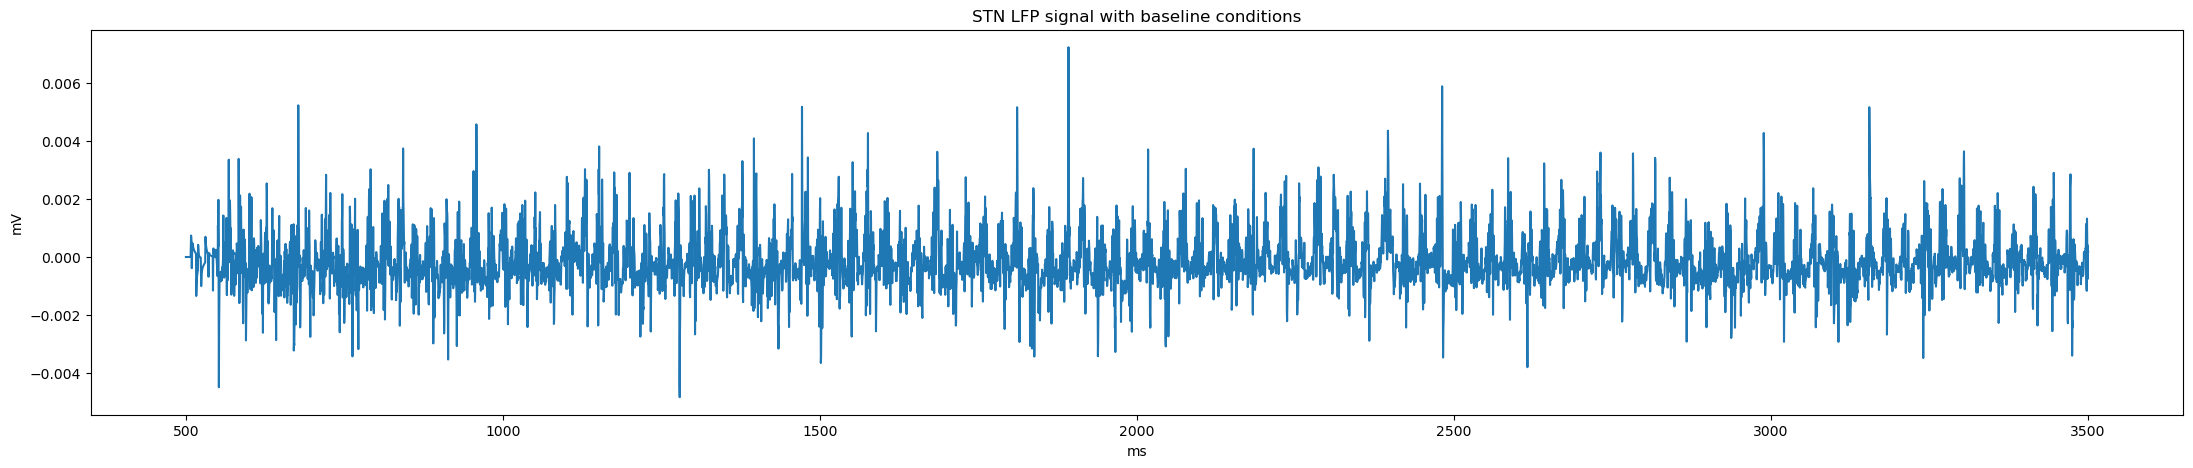

In [36]:
# Plotting results from the zero controler configuration
dir = Path('../Results')
print(os.getcwd())
lfp_t, lfp = load_stn_lfp(dir, 500, 3500)
print(lfp["signal"].shape)
print(lfp.keys())
print(lfp.values())

plt.figure(figsize=(27, 5))
plt.plot(lfp_t, lfp["signal"][:,0])
plt.xlabel('ms')
plt.ylabel('mV')
plt.title('STN LFP signal with baseline conditions')
plt.show()

/Users/abelrassat/Desktop/JHU/JH6/Mills_Lab/CBG_Model_Fleming_PTS/Results_freq_mod
(28300,)
(28300, 1)
dict_keys(['signal', 'signal_units', 'sampling_rate', 'sampling_rate_units', 't_start', 't_start_units', 'annotations'])
dict_values([array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.00265349],
       [-0.00201078],
       [-0.00201078]]), array(['mV'], dtype='<U2'), array([[0.01]]), array(['1/ms'], dtype='<U4'), array([[0.]]), array(['ms'], dtype='<U2'), array([[None]], dtype=object)])


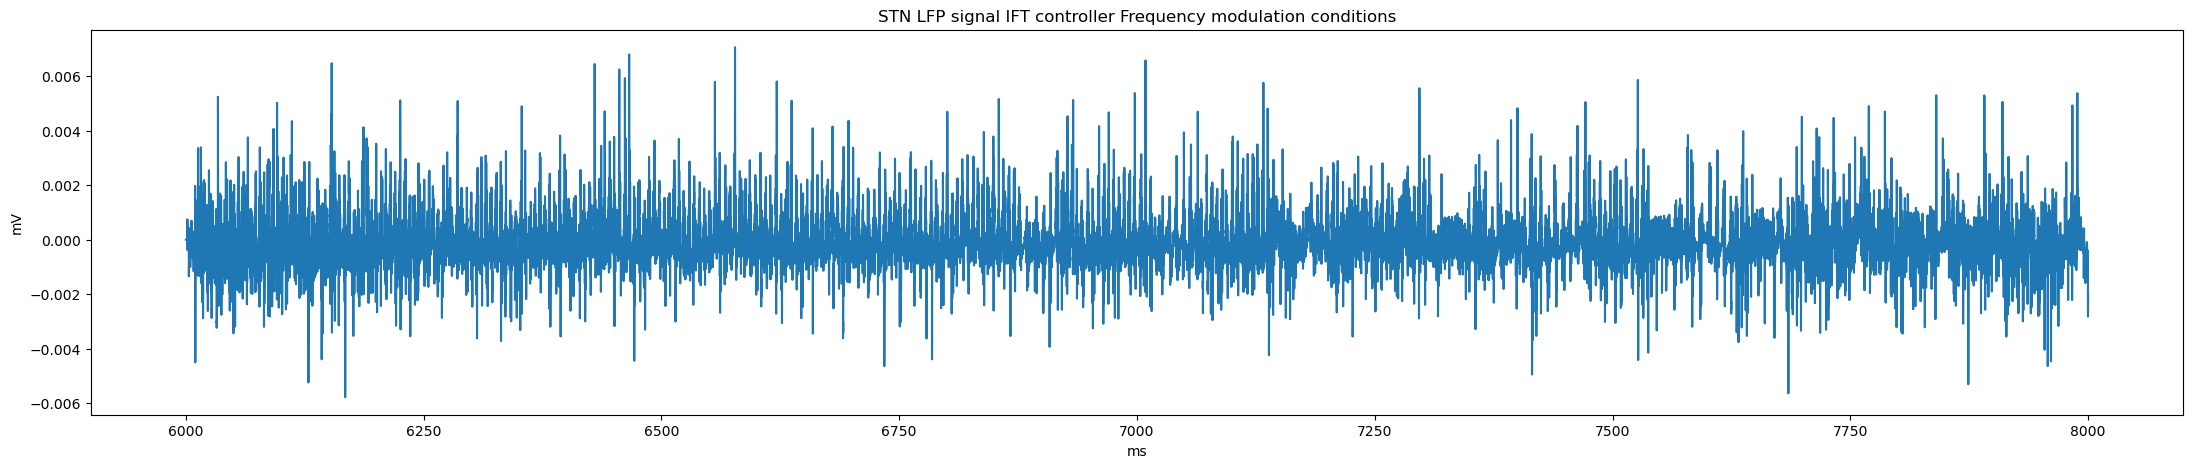

In [35]:
# Plotting results from the IFT frequency modulation controler configuration
dir2 = Path('.')
print(os.getcwd())
lfp_t, lfp = load_stn_lfp(dir2, 6000, 8000)
print(lfp_t.shape)
print(lfp["signal"].shape)
print(lfp.keys())
print(lfp.values())

plt.figure(figsize=(27, 5))
plt.plot(lfp_t, lfp["signal"][:,0])
plt.xlabel('ms')
plt.ylabel('mV')
plt.title('STN LFP signal IFT controller Frequency modulation conditions')
plt.show()